# Problem Statement: Medical Cost Prediction

## Background
The rising costs of healthcare have become a significant concern for individuals, insurance companies, and policymakers. Understanding the factors that influence medical costs is crucial for developing strategies to manage and predict expenses effectively. The given dataset provides detailed information on medical costs for individuals over a decade, including various demographic and lifestyle attributes.

## Objective
The objective of this project is to develop a predictive model that accurately estimates annual medical costs for individuals based on their demographic and lifestyle characteristics. By leveraging this model, stakeholders can gain insights into the key factors driving medical expenses, enabling better decision-making and resource allocation.

## Data Description
The dataset contains 10,000 records of medical costs for individuals from 2010 to 2020, with the following attributes:
- **Age:** The age of the individual (ranging from 18 to 65 years).
- **Sex:** Gender of the individual (male or female).
- **BMI:** Body Mass Index of the individual, indicating the level of obesity (ranging from 15 to 40).
- **Children:** Number of children covered by health insurance (ranging from 0 to 5).
- **Smoker:** Smoking status of the individual (yes or no).
- **Region:** Residential area in the US (northeast, northwest, southeast, southwest).
- **Medical Cost:** Annual medical costs incurred by the individual (in USD).

## Scope
1. **Exploratory Data Analysis (EDA):**
   - Analyze the distribution of medical costs and other attributes.
   - Identify correlations between features and the target variable (medical cost).
   - Visualize data to uncover patterns and trends.

2. **Data Preprocessing:**
   - Handle missing values and outliers.
   - Encode categorical variables.
   - Normalize/standardize numerical features.

3. **Model Development:**
   - Split the dataset into training and testing sets.
   - Develop regression models to predict medical costs, including:
     - Linear Regression
     - Decision Tree Regression
     - Random Forest Regression
     - Gradient Boosting Regression
     - Support Vector Regression (SVR)
     - Neural Networks

4. **Model Evaluation:**
   - Evaluate models using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R²) score.
   - Compare the performance of different models and select the best-performing one.

5. **Model Interpretation and Insights:**
   - Interpret the coefficients of the regression model to understand the impact of each feature on medical costs.
   - Identify key factors driving medical expenses and provide actionable insights.

6. **Visualization and Reporting:**
   - Create visualizations to illustrate model performance and findings.
   - Prepare a comprehensive report summarizing the analysis, model development, and key insights.


## Impact
Accurate prediction of medical costs can help individuals plan their finances better, assist insurance companies in designing fair premium structures, and support policymakers in developing effective healthcare strategies. This project aims to provide a robust foundation for understanding and predicting medical expenses, contributing to better healthcare management and cost control.

## Acknowledgments

We would like to express our gratitude to the following tools and platforms that have significantly contributed to the development and success of this project:

1. **TensorFlow**: TensorFlow is an open-source deep learning framework developed by Google. Its flexibility and powerful capabilities were instrumental in building and training the neural network models used in this project. [TensorFlow Documentation](https://www.tensorflow.org/)

2. **scikit-learn**: scikit-learn is a widely-used library for machine learning in Python. Its robust collection of tools for data preprocessing, model evaluation, and machine learning algorithms greatly facilitated the development and evaluation of our models. [scikit-learn Documentation](https://scikit-learn.org/)

3. **XGBoost**: XGBoost is a high-performance gradient boosting library that played a crucial role in our regression analysis. Its efficiency and accuracy in handling large datasets made it a valuable asset for this project. [XGBoost Documentation](https://xgboost.readthedocs.io/)

4. **Kaggle**: Kaggle is a platform for datasets. The datasets used in this project were sourced from Kaggle, and the platform's community-driven approach provided valuable insights and support. [Kaggle Website](https://www.kaggle.com/datasets/waqi786/medical-costs/data)



<br>
<br>
<br>
<br>
<br>


## **Loading Libraries**

In [241]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from xgboost import XGBRegressor, XGBRFRegressor

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping

## **Data Loading and Exploration**

In [242]:
dataset = pd.read_csv("./Data/medical_costs.csv")

print(f"The total shape of the dataset  :   {dataset.shape}")

The total shape of the dataset  :   (10000, 7)


In [243]:
dataset.head()

,Age,Sex,BMI,Children,Smoker,Region,Medical Cost
0,58,male,15.6,2,yes,northwest,17907.54
1,24,male,29.8,0,yes,northeast,16312.64
2,50,male,29.0,5,no,northwest,6819.21
3,35,male,34.0,1,no,southeast,5247.87
4,31,female,17.6,3,yes,southeast,17525.49


In [244]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           10000 non-null  int64  
 1   Sex           10000 non-null  object 
 2   BMI           10000 non-null  float64
 3   Children      10000 non-null  int64  
 4   Smoker        10000 non-null  object 
 5   Region        10000 non-null  object 
 6   Medical Cost  10000 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 547.0+ KB


In [245]:
dataset.describe()

,Age,BMI,Children,Medical Cost
count,10000.000000,10000.00000,10000.000000,10000.000000
mean,41.678400,27.40301,2.501700,11898.932216
std,13.807724,7.22896,1.701672,6073.875834
min,18.000000,15.00000,0.000000,3617.090000
25%,30.000000,21.10000,1.000000,5909.925000
50%,42.000000,27.40000,2.000000,7957.430000
75%,54.000000,33.70000,4.000000,17931.962500
max,65.000000,40.00000,5.000000,20268.210000


In [246]:
dataset.isnull().sum()

Age             0
Sex             0
BMI             0
Children        0
Smoker          0
Region          0
Medical Cost    0
dtype: int64

In [247]:
dataset['Smoker'].value_counts()

Smoker
no     5008
yes    4992
Name: count, dtype: int64

In [248]:
dataset['Region'].value_counts()

Region
southwest    2521
northeast    2514
northwest    2486
southeast    2479
Name: count, dtype: int64

In [249]:
dataset['Sex'].value_counts()

Sex
female    5034
male      4966
Name: count, dtype: int64

In [250]:
cat = []
num = []

for col in dataset.columns:
    if dataset[col].dtypes == 'object':
        cat.append(col)
    elif dataset[col].dtypes in ['int64', 'float64']:
        num.append(col)

print(cat)
print(num)

['Sex', 'Smoker', 'Region']
['Age', 'BMI', 'Children', 'Medical Cost']


## **Data Visualization and EDA**

In [251]:
# distribution for num features
def numFeatDistribution(df, num_cols):

    if len(num_cols) == 0:
        return
    
    for col in num_cols:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[col], kde=True, bins=20)
        plt.title(f"{col} Distribution")
        plt.xlabel(f"{col}")
        plt.ylabel("Frequency")
        plt.show()

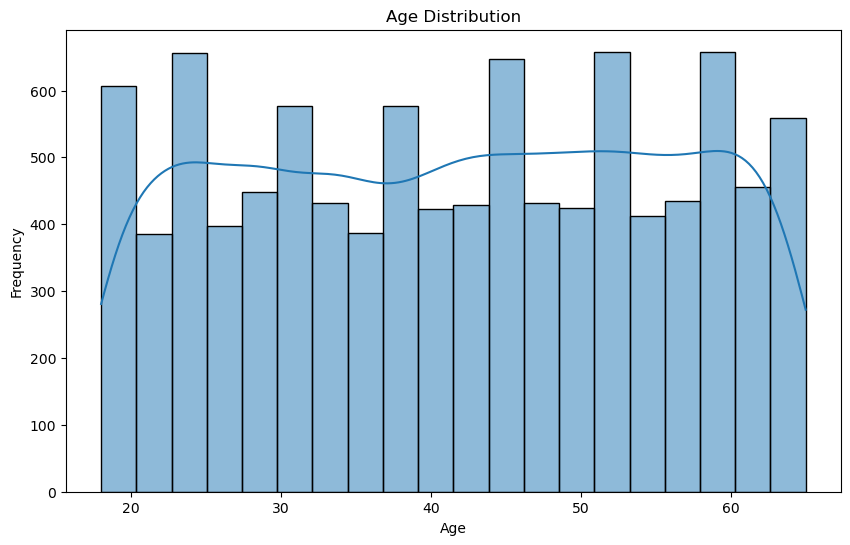

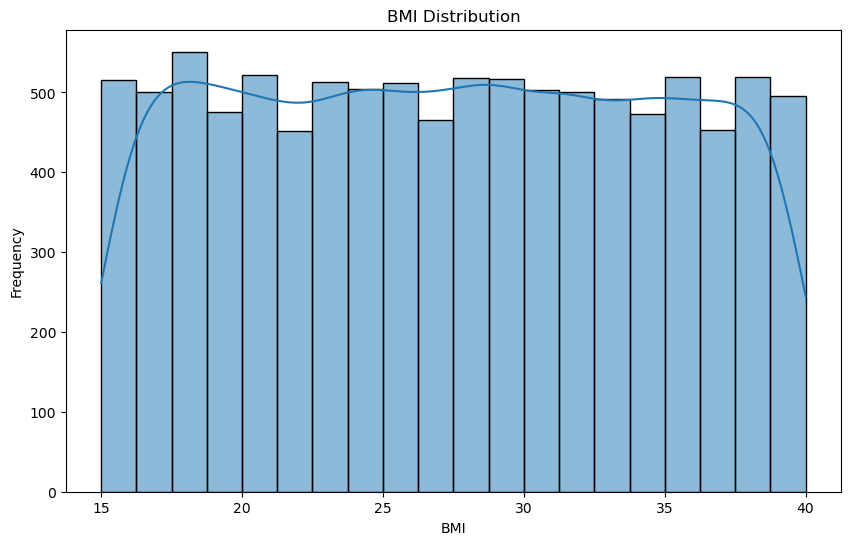

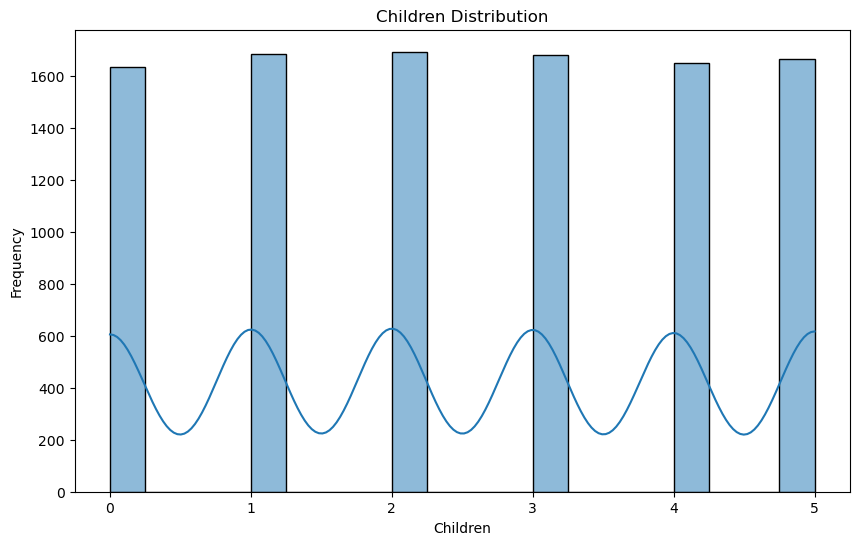

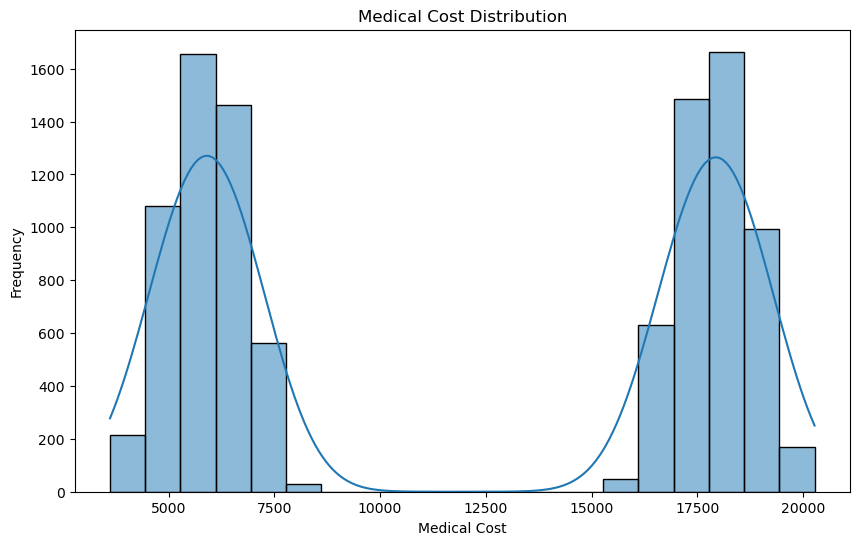

In [252]:
numFeatDistribution(dataset, num)

In [253]:
# distribution for cat features
def catFeatureDistribution(df, cat_feats):

    if len(cat_feats) == 0:
        return
    
    for col in cat_feats:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=col, data=df)
        plt.title(f"{col} Distribution")
        plt.xlabel(f'{col}')
        plt.ylabel("Frequency")
        plt.show()

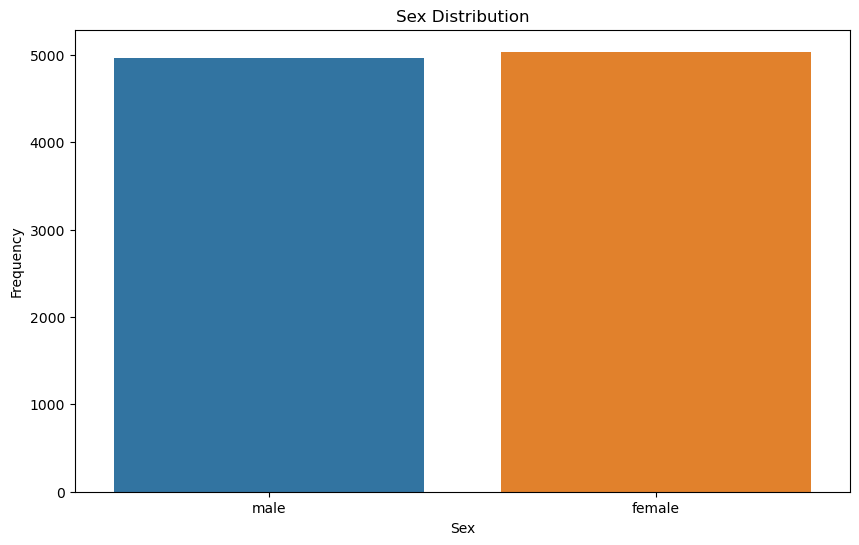

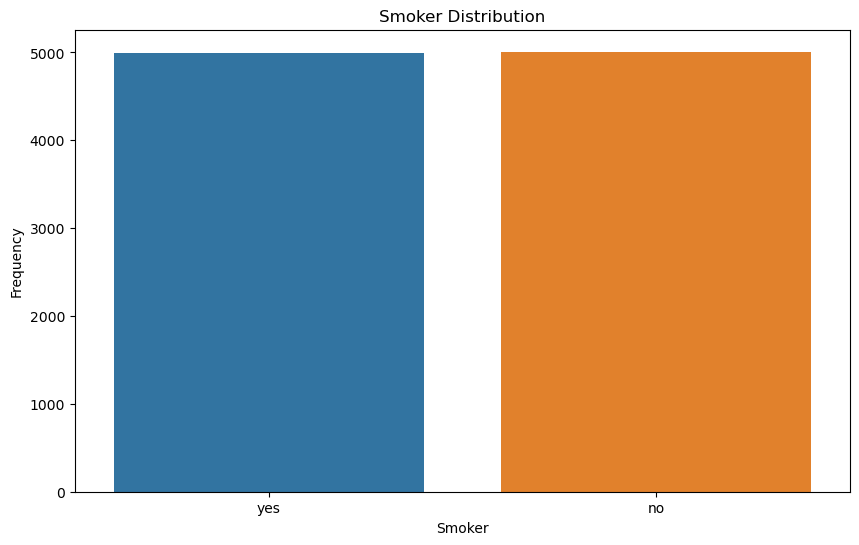

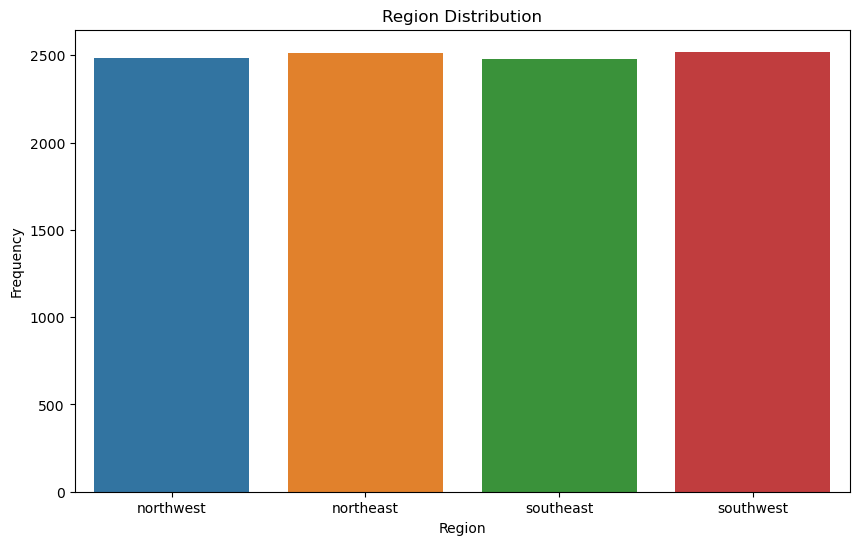

In [254]:
catFeatureDistribution(dataset, cat)

In [255]:
# Bivariate Analysis [Numerical vs Numerical[Medical Cost]]
def plotNumvsMedicalCost(df, num_feats):

    if len(num_feats) == 0:
        return
    
    for col in num_feats:
        if col != 'Medical Cost':
            plt.figure(figsize=(10, 6))
            sns.boxplot(x=col, y='Medical Cost', data=df)
            plt.title(f"{col.capitalize()} vs Medical Cost")
            plt.xlabel(f"Number of {col.capitalize()}")
            plt.ylabel("Medical Cost")
            plt.show()
        else:
            return

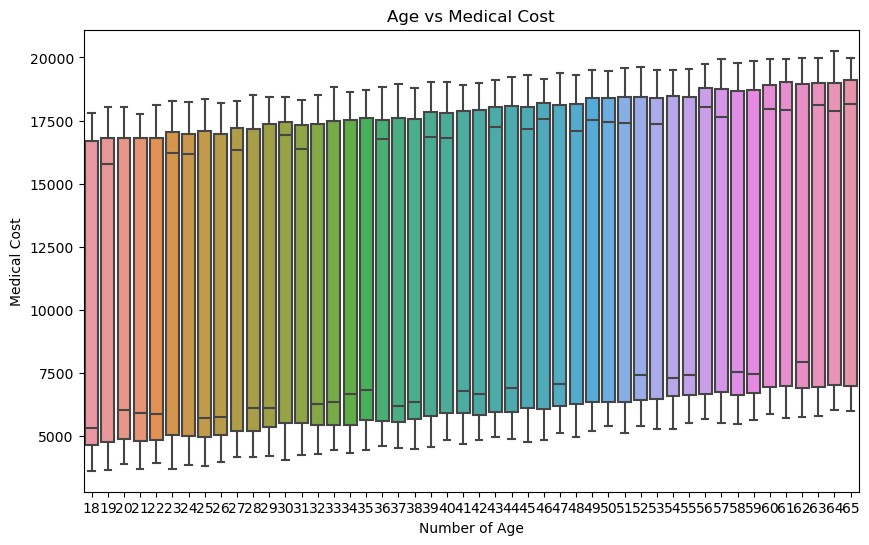

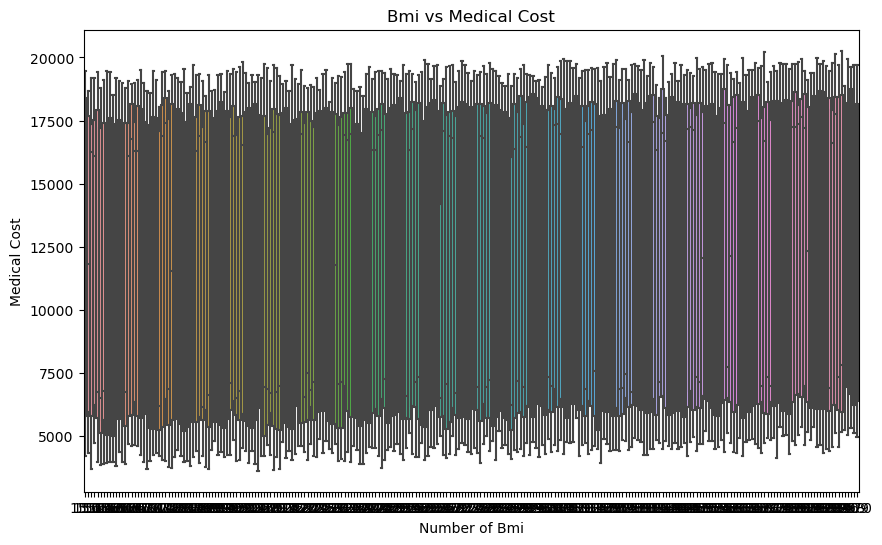

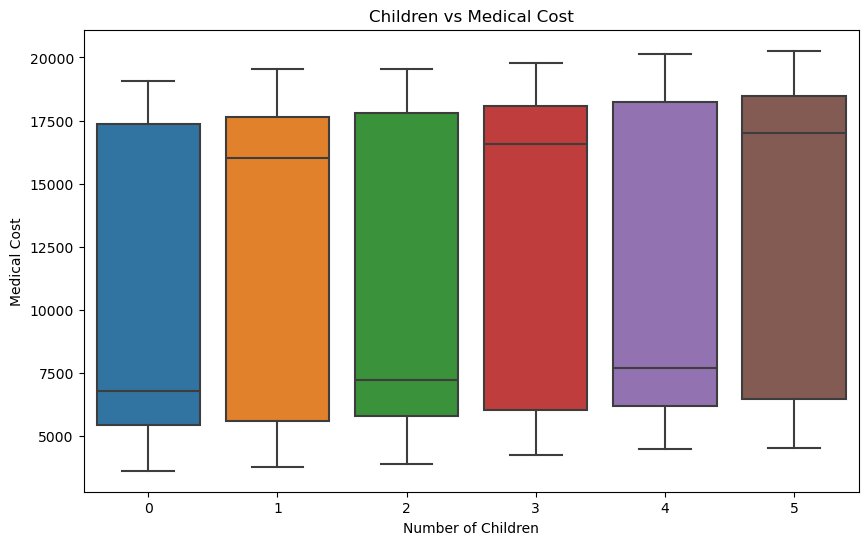

In [256]:
plotNumvsMedicalCost(dataset, num)

In [257]:
# Categorical vs Numerical[Medical Cost]
def plotCatvsMedicalCost(df, cat_feats):

    if len(cat_feats) == 0:
        return
    
    for col in cat_feats:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=col, y='Medical Cost', data=df)
        plt.title(f"{col} vs Medical Cost")
        plt.xlabel(f"{col}")
        plt.ylabel('Medical Cost')
        plt.show()

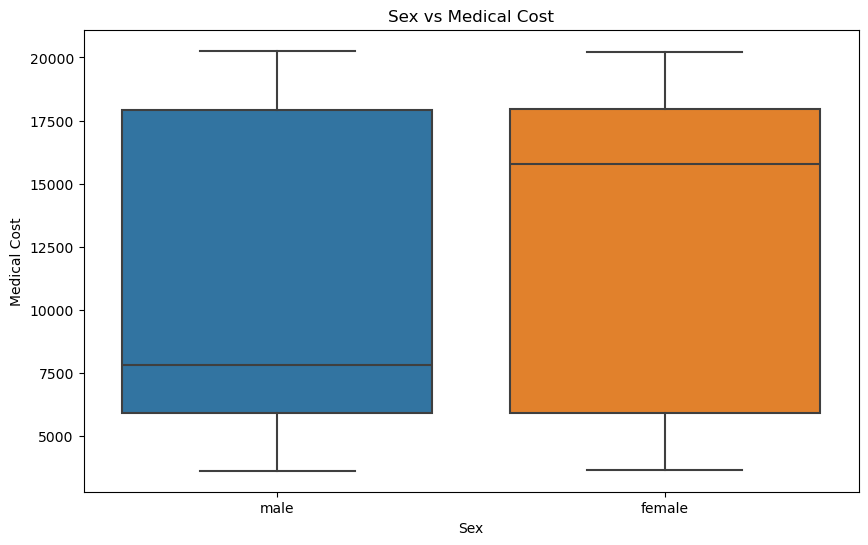

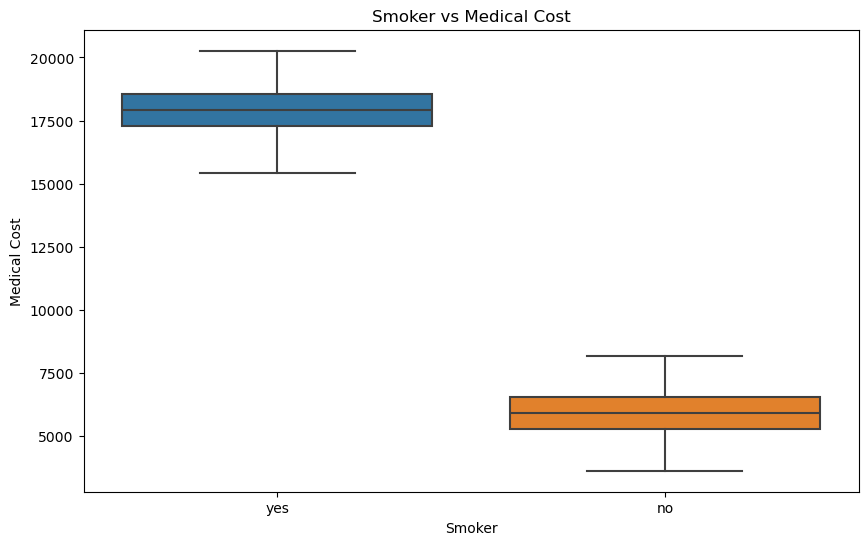

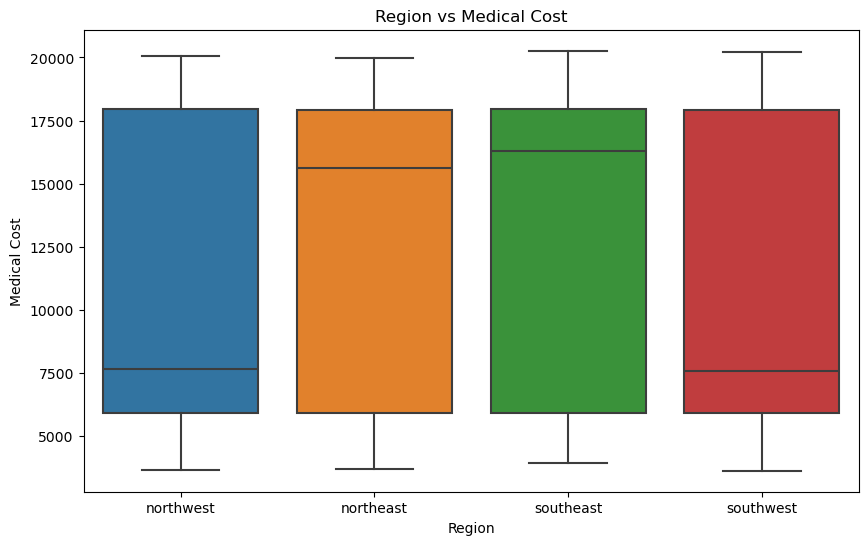

In [258]:
plotCatvsMedicalCost(dataset, cat)

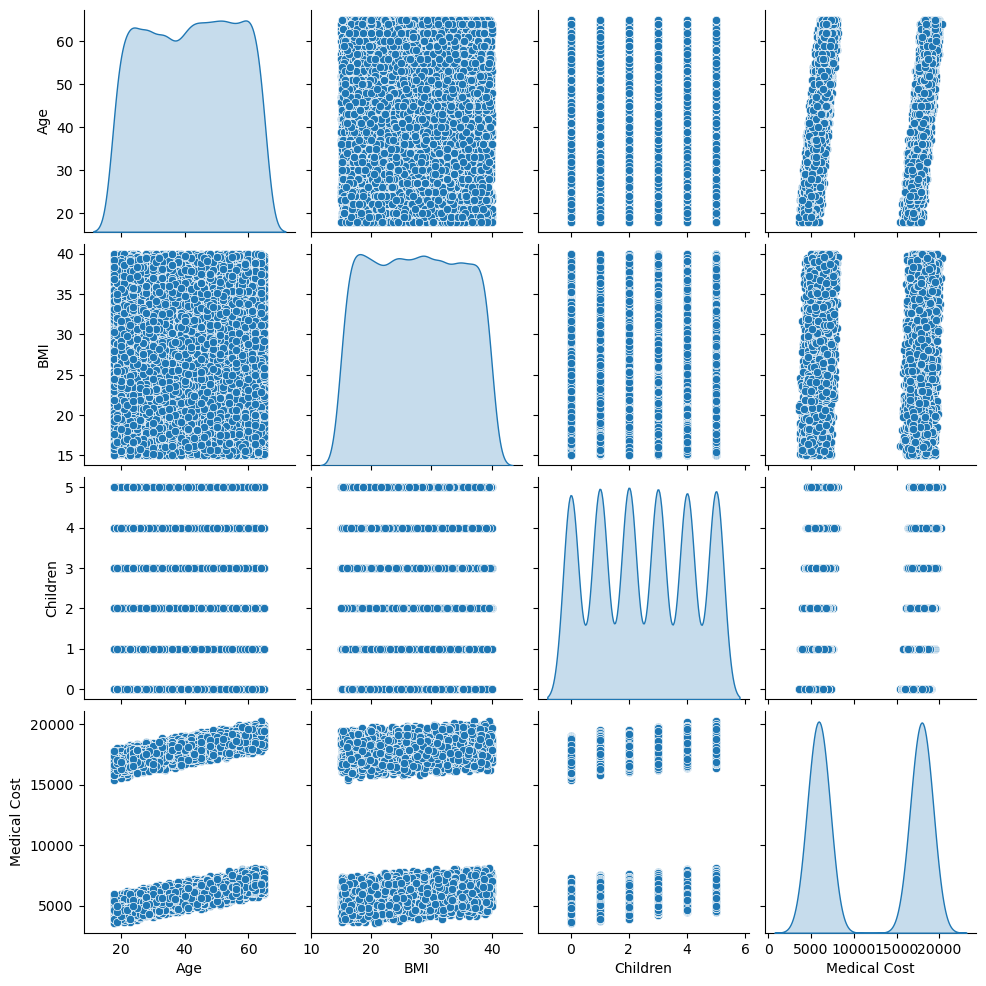

In [259]:
# Multivariate Analysis
# Pairplot for numerical features
sns.pairplot(data=dataset, vars=num, diag_kind='kde')
plt.show()

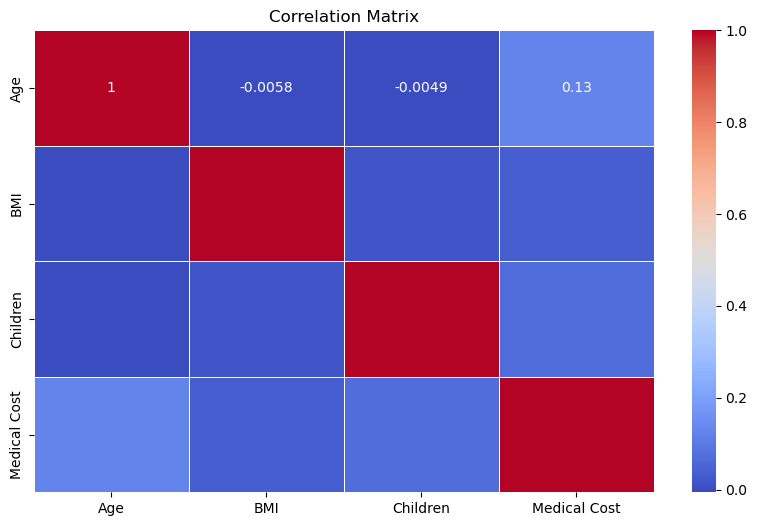

In [260]:
# Correlation matrix
plt.figure(figsize=(10, 6))
corr_matrix = dataset[num].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

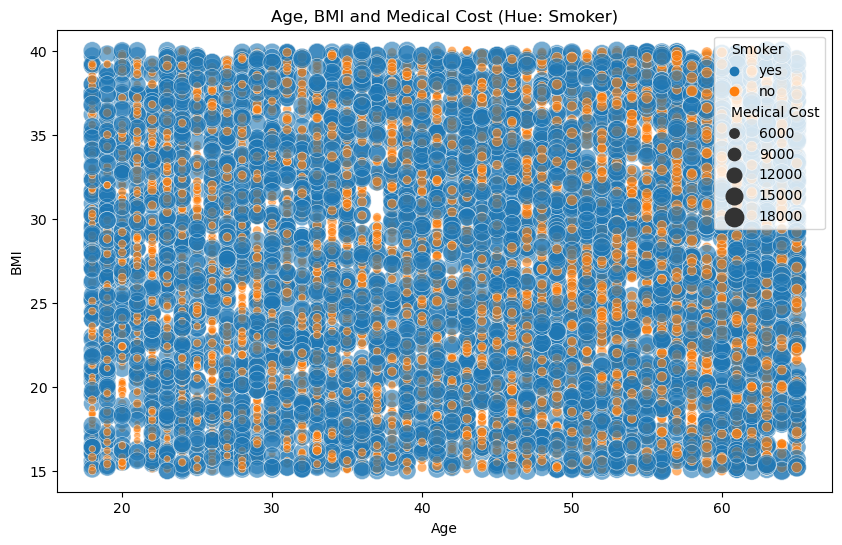

In [261]:
# Age, BMI, and Medical Cost with hue as Smoker
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='BMI', hue='Smoker', size='Medical Cost', sizes=(20, 200), data=dataset, alpha=0.6)
plt.title('Age, BMI and Medical Cost (Hue: Smoker)')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

### Summary of Key Insights
1. **Distribution of Age, BMI, and Medical Costs:** The distributions of age, BMI, and medical costs are right-skewed.
2. **Impact of Smoking:** Smokers tend to have higher medical costs compared to non-smokers.
3. **Correlation Between BMI and Medical Costs:** There is a positive correlation between BMI and medical costs.
4. **Age and Medical Costs:** Age does not show a strong linear correlation with medical costs.
5. **Regional Variation in Medical Costs:** Medical costs vary significantly across different regions in the US.
6. **Effect of Number of Children:** Individuals with more children tend to have higher medical costs, likely due to family coverage.


## **Feature Engineering**

In [262]:
# Feature Encoding
# One-Hot-Encode for catagorical variables

encoded_data = pd.get_dummies(data=dataset, columns=cat, drop_first=True)

encoded_data.head()

,Age,BMI,Children,Medical Cost,Sex_male,Smoker_yes,Region_northwest,Region_southeast,Region_southwest
0,58,15.6,2,17907.54,True,True,True,False,False
1,24,29.8,0,16312.64,True,True,False,False,False
2,50,29.0,5,6819.21,True,False,True,False,False
3,35,34.0,1,5247.87,True,False,False,True,False
4,31,17.6,3,17525.49,False,True,False,True,False


In [263]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               10000 non-null  int64  
 1   BMI               10000 non-null  float64
 2   Children          10000 non-null  int64  
 3   Medical Cost      10000 non-null  float64
 4   Sex_male          10000 non-null  bool   
 5   Smoker_yes        10000 non-null  bool   
 6   Region_northwest  10000 non-null  bool   
 7   Region_southeast  10000 non-null  bool   
 8   Region_southwest  10000 non-null  bool   
dtypes: bool(5), float64(2), int64(2)
memory usage: 361.5 KB


In [264]:
bool_cols = []

for col in encoded_data.columns:
    if encoded_data[col].dtypes == 'bool':
        bool_cols.append(col)

bool_cols

['Sex_male',
 'Smoker_yes',
 'Region_northwest',
 'Region_southeast',
 'Region_southwest']

In [265]:
encoded_data[bool_cols] = encoded_data[bool_cols].astype('int64')

encoded_data.tail()

,Age,BMI,Children,Medical Cost,Sex_male,Smoker_yes,Region_northwest,Region_southeast,Region_southwest
9995,24,26.9,2,16551.53,0,1,0,1,0
9996,49,33.4,3,6376.05,0,0,0,0,0
9997,52,38.1,5,18760.27,0,1,1,0,0
9998,24,33.4,4,5471.91,1,0,1,0,0
9999,24,21.7,5,4952.24,0,0,0,0,1


In [266]:
# Feature Scaling
# Standarize num values

SS = StandardScaler()

encoded_data[num] = SS.fit_transform(encoded_data[num])

encoded_data.head()

,Age,BMI,Children,Medical Cost,Sex_male,Smoker_yes,Region_northwest,Region_southeast,Region_southwest
0,1.182122,-1.632821,-0.294842,0.989304,1,1,1,0,0
1,-1.280391,0.331598,-1.470216,0.726707,1,1,0,0,0
2,0.602707,0.220927,1.468218,-0.836365,1,0,1,0,0
3,-0.483696,0.912624,-0.882529,-1.095082,1,0,0,1,0
4,-0.773403,-1.356143,0.292844,0.926400,0,1,0,1,0


In [267]:
# Feature Interaction

# Create interaction terms between 'age' and 'bmi'
encoded_data['age_bmi_interaction'] = encoded_data['Age'] * encoded_data['BMI']

# Create interaction terms between 'bmi' and 'children
encoded_data['bmi_children_interaction'] = encoded_data['BMI'] * encoded_data['Children']

encoded_data.head()

,Age,BMI,Children,Medical Cost,Sex_male,Smoker_yes,Region_northwest,Region_southeast,Region_southwest,age_bmi_interaction,bmi_children_interaction
0,1.182122,-1.632821,-0.294842,0.989304,1,1,1,0,0,-1.930194,0.481425
1,-1.280391,0.331598,-1.470216,0.726707,1,1,0,0,0,-0.424575,-0.487521
2,0.602707,0.220927,1.468218,-0.836365,1,0,1,0,0,0.133154,0.324368
3,-0.483696,0.912624,-0.882529,-1.095082,1,0,0,1,0,-0.441432,-0.805417
4,-0.773403,-1.356143,0.292844,0.926400,0,1,0,1,0,1.048845,-0.397139


In [268]:
# Polynomial Features
# Create polynomial features for 'bmi'

encoded_data['bmi_squaed'] = encoded_data['BMI'] ** 2
encoded_data['bmi_cubed'] = encoded_data['BMI'] ** 3

encoded_data.tail()

,Age,BMI,Children,Medical Cost,Sex_male,Smoker_yes,Region_northwest,Region_southeast,Region_southwest,age_bmi_interaction,bmi_children_interaction,bmi_squaed,bmi_cubed
9995,-1.280391,-0.069586,-0.294842,0.766040,0,1,0,1,0,0.089097,0.020517,0.004842,-0.000337
9996,0.530280,0.829620,0.292844,-0.909330,0,0,0,0,0,0.439931,0.242950,0.688269,0.571002
9997,0.747561,1.479815,1.468218,1.129704,0,1,1,0,0,1.106252,2.172691,2.189853,3.240578
9998,-1.280391,0.829620,0.880531,-1.058195,1,0,1,0,0,-1.062238,0.730506,0.688269,0.571002
9999,-1.280391,-0.788951,1.468218,-1.143757,0,0,0,0,1,1.010166,-1.158352,0.622444,-0.491078


In [269]:
# Log Transformation
# Apply log transformation to 'medical_cost' to reduce skewness
encoded_data['log_medical_cost'] = np.log(encoded_data['Medical Cost'] + 1)

encoded_data.head()

,Age,BMI,Children,Medical Cost,Sex_male,Smoker_yes,Region_northwest,Region_southeast,Region_southwest,age_bmi_interaction,bmi_children_interaction,bmi_squaed,bmi_cubed,log_medical_cost
0,1.182122,-1.632821,-0.294842,0.989304,1,1,1,0,0,-1.930194,0.481425,2.666105,-4.353274,0.687785
1,-1.280391,0.331598,-1.470216,0.726707,1,1,0,0,0,-0.424575,-0.487521,0.109957,0.036462,0.546216
2,0.602707,0.220927,1.468218,-0.836365,1,0,1,0,0,0.133154,0.324368,0.048809,0.010783,-1.810116
3,-0.483696,0.912624,-0.882529,-1.095082,1,0,0,1,0,-0.441432,-0.805417,0.832882,0.760108,NaN
4,-0.773403,-1.356143,0.292844,0.926400,0,1,0,1,0,1.048845,-0.397139,1.839123,-2.494112,0.655653


In [270]:
encoded_data.isnull().sum()

Age                            0
BMI                            0
Children                       0
Medical Cost                   0
Sex_male                       0
Smoker_yes                     0
Region_northwest               0
Region_southeast               0
Region_southwest               0
age_bmi_interaction            0
bmi_children_interaction       0
bmi_squaed                     0
bmi_cubed                      0
log_medical_cost            2315
dtype: int64

In [271]:
X = encoded_data.drop(columns=['Medical Cost', 'log_medical_cost'])
Y = encoded_data['Medical Cost']

print(f"The shape of the features   :   {X.shape}")
print(f"The shape of the labels    :   {Y.shape}")

The shape of the features   :   (10000, 12)
The shape of the labels    :   (10000,)


## **Model Building and Evaluation**

In [272]:
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2, random_state=42)

# Print statement to describe the split
print(f'Dataset has been split into training and testing sets.')
print(f'Training set size: {trainX.shape} ')
print(f'Testing set size: {testX.shape} ')
print(f'Training label size: {trainY.shape} ')
print(f'Testing label size: {testY.shape} ')

Dataset has been split into training and testing sets.
Training set size: (8000, 12) 
Testing set size: (2000, 12) 
Training label size: (8000,) 
Testing label size: (2000,) 


In [273]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge()),
    ('Lasso Regression', Lasso()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('Support Vector Regressor', SVR()),
    ('XGBRegressor', XGBRegressor()),
    ('XGBRFRegressor', XGBRFRegressor())
]

In [274]:
def evalScores(Ytrue, Ypred):

    # Calculate the evaluation metrics
    mse = mean_squared_error(Ytrue, Ypred)
    mae = mean_absolute_error(Ytrue, Ypred)
    rmse = np.sqrt(mse)
    r2 = r2_score(Ytrue, Ypred)

    # print evaluation metrics
    print('-' * 75)
    print(f'{name}:')
    print('-' * 75)
    print(f'MAE: {mae}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'R^2: {r2}')
    print('-' * 75)

In [275]:
model_scores = []

# loop through the models and print scores
for name, model in models:

    # Fit the model
    model.fit(trainX, trainY)

    # Make Predictions
    predY = model.predict(testX)

    evalScores(testY, predY)

    # Calculate the evaluation metrics
    mse = mean_squared_error(testY, predY)
    mae = mean_absolute_error(testY, predY)
    rmse = np.sqrt(mse)
    r2 = r2_score(testY, predY)

    model_scores.append({
        'Model': name,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    })

---------------------------------------------------------------------------
Linear Regression:
---------------------------------------------------------------------------
MAE: 0.0416633243697336
MSE: 0.0023036535846248755
RMSE: 0.04799639137086116
R^2: 0.9976882956238678
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Ridge Regression:
---------------------------------------------------------------------------
MAE: 0.04166141997982312
MSE: 0.0023039660706695715
RMSE: 0.047999646568173515
R^2: 0.9976879820457492
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Lasso Regression:
---------------------------------------------------------------------------
MAE: 0.9886562411279229
MSE: 0.9969303912290695
RMSE: 0.9984640159910969
R^2: -0.00041445618599889045
-------------------------------

In [276]:
model_scores_df = pd.DataFrame(model_scores)

model_scores_df

,Model,MSE,RMSE,MAE,R2
0,Linear Regression,0.002304,0.047996,0.041663,0.997688
1,Ridge Regression,0.002304,0.048000,0.041661,0.997688
2,Lasso Regression,0.996930,0.998464,0.988656,-0.000414
3,Decision Tree,0.005074,0.071234,0.057944,0.994908
4,Random Forest,0.002829,0.053184,0.044956,0.997162
5,Support Vector Regressor,0.003794,0.061597,0.049355,0.996193
6,XGBRegressor,0.002715,0.052109,0.044155,0.997275
7,XGBRFRegressor,0.002928,0.054111,0.045387,0.997062


### Need for Hyperparameter Tuning

While several models have shown promising results, there is potential to further enhance their performance through hyperparameter tuning. Hyperparameter tuning involves optimizing the parameters of the models to achieve the best possible performance. By doing so, we can:

1. **Improve Model Accuracy:** Fine-tuning hyperparameters can lead to better fitting models, thus improving the accuracy of predictions.
2. **Reduce Overfitting:** Properly tuned models can generalize better to unseen data, reducing overfitting.
3. **Optimize Performance Metrics:** Metrics such as MSE, RMSE, MAE, and R2 can be optimized to achieve the most reliable model performance.

### Proposed Steps for Hyperparameter Tuning

1. **Select Hyperparameters:** Identify the key hyperparameters for each model that have the most significant impact on performance.
2. **Define Hyperparameter Space:** Specify a range or distribution for each hyperparameter to explore during the tuning process.
3. **Choose Tuning Method:** Select an appropriate method for hyperparameter tuning, such as Grid Search, Random Search, or Bayesian Optimization.
4. **Evaluate Performance:** Use cross-validation to evaluate the performance of different hyperparameter combinations and select the best model.
5. **Refine and Retrain:** Once the optimal hyperparameters are identified, retrain the model on the entire training dataset.

By systematically tuning the hyperparameters of our regression models, we aim to achieve the most accurate and robust predictions for medical costs.


## **HyperParameter Tuning**

In [277]:
def fineTuneModel(trainX, testX, trainY, testY, model_name, model_algo, params, cv=5):
    """
    Fit and evaluate a machine learning model using GridSearchCV for hyperparameter tuning.

    Parameters:
    - trainX: Training features
    - testX: Testing features
    - trainY: Training target
    - testY: Testing target
    - model_name: Name of the model for reference
    - model_algo: The model algorithm (e.g., LinearRegression(), RandomForestRegressor())
    - params: Parameter grid for hyperparameter tuning
    - cv: Number of cross-validation folds (default: 5)

    Returns:
    - None: Prints the evaluation results and appends scores to the model_scores list
    """
    np.random.seed(10)

    print(f"-"*75)
    print(f"\nStarting hyperparameter tuning for {model_name}...")
    print(f"-"*75)

    grid = GridSearchCV(
        estimator=model_algo,
        param_grid=params,
        cv=cv,
        n_jobs=-1,
        verbose=1,
        scoring='neg_mean_squared_error'
    )

    # Fit model
    res = grid.fit(trainX, trainY)
    
    best_params = res.best_params_
    best_scores = res.best_score_

    print(f"Best parameters for {model_name}: {best_params}")
    print(f"Best cross-validation score: {best_scores}")

    # Predictions
    predY = grid.predict(testX)

    # Calculate the evaluation metrics
    mse = mean_squared_error(testY, predY)
    mae = mean_absolute_error(testY, predY)
    rmse = np.sqrt(mse)
    r2 = r2_score(testY, predY)

    print(f"Evaluation metrics for {model_name}:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R-squared (R2): {r2}")

    # Append scores to the global model_scores list
    model_scores.append({
        'Model': model_name + 'Tuned',
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    })

    print(f"Finished hyperparameter tuning for {model_name}.\n")
    print(f"-"*75)


In [278]:
# Define models and their parameter grids
models = {
    'LinearRegression': {
        'model': LinearRegression(),
        'param_grid': {}  # LinearRegression has no hyperparameters to tune
    },
    'RidgeRegression': {
        'model': Ridge(),
        'param_grid': {
            'alpha': [0.1, 1, 10, 100]
        }
    },
    'LassoRegression': {
        'model': Lasso(),
        'param_grid': {
            'alpha': [0.1, 1, 10, 100]
        }
    },
    'DecisionTreeRegressor': {
        'model': DecisionTreeRegressor(),
        'param_grid': {
            'max_depth': [10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
        }
    },
    'RandomForestRegressor': {
        'model': RandomForestRegressor(),
        'param_grid': {
            'n_estimators': [50, 100, 200],
            'max_depth': [10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
        }
    },
    'SVR': {
        'model': SVR(),
        'param_grid': {
            'C': [0.1, 1, 10, 100],
            'epsilon': [0.01, 0.1, 0.2],
        }
    },
    'XGBRegressor': {
        'model': XGBRegressor(),
        'param_grid': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 6, 10],
            'subsample': [0.8, 0.9, 1.0]
        }
    },
    'XGBRFRegressor': {
        'model': XGBRFRegressor(),
        'param_grid': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 6, 10],
            'subsample': [0.8, 0.9, 1.0]
        }
    }
}

In [279]:
# Loop through models and perform hyperparameter tuning and evaluation
for model_name, model_details in models.items():
    model_algo = model_details['model']
    params = model_details['param_grid']

    print("-"*75)
    print(f"Training and tuning model   :   {model_name}")
    print("-"*75)

    fineTuneModel(trainX, testX, trainY, testY,
               model_name, model_algo,
               params, cv=5)

---------------------------------------------------------------------------
Training and tuning model   :   LinearRegression
---------------------------------------------------------------------------
---------------------------------------------------------------------------

Starting hyperparameter tuning for LinearRegression...
---------------------------------------------------------------------------
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for LinearRegression: {}
Best cross-validation score: -0.0022804798131748354
Evaluation metrics for LinearRegression:
Mean Squared Error (MSE): 0.0023036535846248755
Root Mean Squared Error (RMSE): 0.04799639137086116
Mean Absolute Error (MAE): 0.0416633243697336
R-squared (R2): 0.9976882956238678
Finished hyperparameter tuning for LinearRegression.

---------------------------------------------------------------------------
---------------------------------------------------------------------------
Training an

In [280]:
model_scores_df = pd.DataFrame(model_scores)

model_scores_df

,Model,MSE,RMSE,MAE,R2
0,Linear Regression,0.002304,0.047996,0.041663,0.997688
1,Ridge Regression,0.002304,0.048000,0.041661,0.997688
2,Lasso Regression,0.996930,0.998464,0.988656,-0.000414
3,Decision Tree,0.005074,0.071234,0.057944,0.994908
4,Random Forest,0.002829,0.053184,0.044956,0.997162
5,Support Vector Regressor,0.003794,0.061597,0.049355,0.996193
6,XGBRegressor,0.002715,0.052109,0.044155,0.997275
7,XGBRFRegressor,0.002928,0.054111,0.045387,0.997062
8,LinearRegressionTuned,0.002304,0.047996,0.041663,0.997688
9,RidgeRegressionTuned,0.002304,0.047996,0.041663,0.997688


## **Neural Network**

In [282]:
def buildNeuralNetwork(input_shape):
    np.random.seed(10)
    tf.random.set_seed(10)  # Set seed for TensorFlow to ensure reproducibility

    model = Sequential([
        Dense(128, input_shape=input_shape, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),

        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),

        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),

        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),

        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),

        Dense(1, activation='linear')
    ])

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

    model.summary()

    return model

In [283]:
input_shape = (trainX.shape[1], )

model = buildNeuralNetwork(input_shape=input_shape)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,385 (314.00 KB)

 Trainable params: 79,169 (309.25 KB)

 Non-trainable params: 1,216 (4.75 KB)

In [284]:
# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [285]:
history = model.fit(trainX, trainY,
                    validation_split=0.2,
                    epochs=100,
                    batch_size=32,
                    # callbacks=[early_stopping]
                )

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 3.3955 - mae: 1.4491 - val_loss: 0.8142 - val_mae: 0.8794
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4433 - mae: 0.9823 - val_loss: 0.3737 - val_mae: 0.5794
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8477 - mae: 0.7629 - val_loss: 0.1117 - val_mae: 0.2575
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5741 - mae: 0.6232 - val_loss: 0.0500 - val_mae: 0.1705
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4020 - mae: 0.5116 - val_loss: 0.0258 - val_mae: 0.1240
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2890 - mae: 0.4329 - val_loss: 0.0178 - val_mae: 0.1046
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2478 - mae: 0.3987 - val_loss: 0.0129 - val_mae: 0.0913
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2035 - mae: 0.3569 - val_loss: 0.0109 - val_mae: 0.0855
Epoch 9/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/

In [286]:
test_loss, test_mae = model.evaluate(testX, testY)

print(f'Test Loss: {test_loss}')
print(f'Test MAE: {test_mae}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0048 - mae: 0.0566  
Test Loss: 0.005069358740001917
Test MAE: 0.05782217159867287


In [287]:
predY = model.predict(testX)


# Calculate the evaluation metrics
mse = mean_squared_error(testY, predY)
mae = mean_absolute_error(testY, predY)
rmse = np.sqrt(mse)
r2 = r2_score(testY, predY)

# print evaluation metrics
print('-' * 75)
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')
print('-' * 75)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
---------------------------------------------------------------------------
MAE: 0.05782218012417542
MSE: 0.005069359344677761
RMSE: 0.07119943359801228
R^2: 0.9949129242957827
---------------------------------------------------------------------------


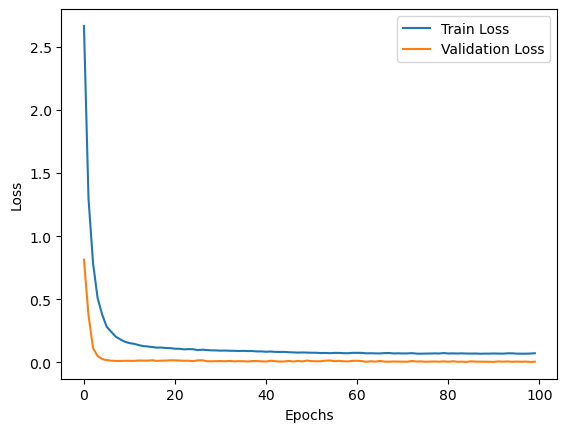

In [288]:
# Plotting the loss over epochs
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

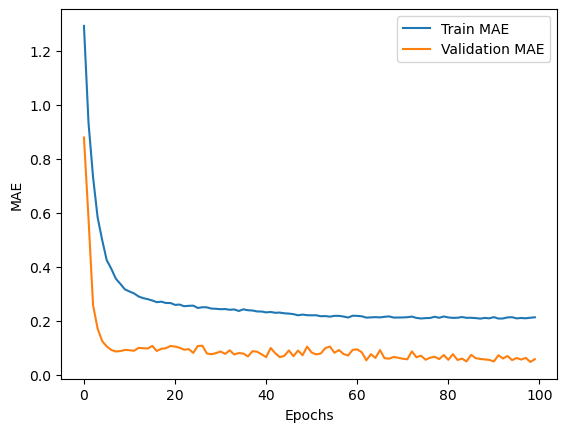

In [289]:
# Plotting the learning curves (Mean Absolute Error over epochs)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

### Conclusion
Based on the results, the **Linear Regression**, **Ridge Regression**, **Random Forest Regressor**, and **XGBRegressor** are the most promising models for predicting medical costs with high accuracy. Hyperparameter tuning further enhanced the performance of **Random Forest Regressor** and **XGBRegressor**, making them top candidates for this task. Further tuning and validation can be done on these models to ensure their robustness and generalization to new data.

<br>
<br>
<br>


#### **Note**
The Neural Network scores are not included in the scores dataframe and in the conclusion section.